 ## Set up

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

import config
from config import LEVELS, sm, with_sm, no_sm, with_unique_sm, GRAPHS_PATH, genes, proteins, proteoforms
from interactomes import get_interactome, print_interactome_details, get_json_filename, read_graph, get_nums
from lib.graph_database import get_participants, get_components

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


In [2]:
# Genes:
# Pathway, Reaction, Entity, Name, Type, Id, Database, Role

# Proteins:
# Pathway, Reaction, Entity, Name, Type, Id, PrevId, Database, Role

# Proteoforms:
# Pathway, Reaction, Entity, Name, Type, Id, PrevId, Database, Role

# Small molecules:
# Pathway, Reaction, Entity, Name, Type, Id, Database, Role

participant_records = { l: get_participants(l, GRAPHS_PATH) for l in LEVELS}
participant_records[sm] = get_participants(sm, GRAPHS_PATH)

participant_records

{'genes':         Unnamed: 0        Pathway       Reaction         Entity    Name  \
 0                0  R-HSA-1059683  R-HSA-1067640   R-HSA-447100     IL6   
 1                1  R-HSA-1059683  R-HSA-1067640  R-HSA-1067661  IL6R-2   
 2                2  R-HSA-1059683  R-HSA-1067640   R-HSA-447100     IL6   
 3                3  R-HSA-1059683  R-HSA-1067640  R-HSA-1067661  IL6R-2   
 4                4  R-HSA-1059683  R-HSA-1067646   R-HSA-448453   IL6ST   
 ...            ...            ...            ...            ...     ...   
 248393      248393   R-HSA-997272  R-HSA-1013020   R-HSA-164383    GNG5   
 248394      248394   R-HSA-997272  R-HSA-1013020   R-HSA-164367   GNG12   
 248395      248395   R-HSA-997272  R-HSA-1013020   R-HSA-164380    GNG2   
 248396      248396   R-HSA-997272  R-HSA-1013020   R-HSA-420716  GABBR1   
 248397      248397   R-HSA-997272  R-HSA-1013020   R-HSA-420747  GABBR2   
 
                                  Type      Id Database              Role  
 

In [3]:
# Genes:
# Complex, Entity, Name, Type, Id

# Proteins:
# Complex, Entity, Name, Type, Id, PrevId

# Proteoforms:
# Complex, Entity, Name, Type, Id, PrevId

# Small molecules:
# Complex, Entity, Name, Type, Id

components_records = { l: get_components(l, GRAPHS_PATH) for l in LEVELS}
components_records[sm] = get_components(sm, GRAPHS_PATH)

components_records

{'genes':         Unnamed: 0        Complex         Entity          Name  \
 0                0  R-HSA-1006173   R-HSA-976788           CFH   
 1                1  R-HSA-1008206  R-HSA-1008221          NFE2   
 2                2  R-HSA-1008206  R-HSA-1008261          MAFF   
 3                3  R-HSA-1008206  R-HSA-1008212          MAFG   
 4                4  R-HSA-1008206  R-HSA-1008242          MAFK   
 ...            ...            ...            ...           ...   
 108399      108399   R-NUL-997399   R-HSA-879433         S100B   
 108400      108400   R-NUL-997399   R-HSA-976740  APP(672-711)   
 108401      108401   R-NUL-997399   R-HSA-879382         HMGB1   
 108402      108402   R-NUL-997399  R-HSA-2457833  SAA1(19-122)   
 108403      108403   R-NUL-997399   R-HSA-197639          AGER   
 
                                  Type     Id  
 0       EntityWithAccessionedSequence    CFH  
 1       EntityWithAccessionedSequence   NFE2  
 2       EntityWithAccessionedSequence   

In [4]:
interactomes_no_sm = { l: get_interactome(l, no_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}
for level, interactome in interactomes_no_sm.items():
     print_interactome_details(interactome)

Graph for genes 
Graph edges: 453137
Graph nodes: 10968
Graph genes nodes: 10968
Graph small molecule nodes: 0

***********************


Graph for proteins 
Graph edges: 462430
Graph nodes: 11066
Graph proteins nodes: 11066
Graph small molecule nodes: 0

***********************


Graph for proteoforms 
Graph edges: 677057
Graph nodes: 14295
Graph proteoforms nodes: 14295
Graph small molecule nodes: 0

***********************




In [5]:
interactomes_with_sm = { l: get_interactome(l, with_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}
for level, interactome in interactomes_with_sm.items():
     print_interactome_details(interactome)

Graph for genes 
Graph edges: 528969
Graph nodes: 12933
Graph genes nodes: 10968
Graph small molecule nodes: 1965

***********************


Graph for proteins 
Graph edges: 538874
Graph nodes: 13031
Graph proteins nodes: 11066
Graph small molecule nodes: 1965

***********************


Graph for proteoforms 
Graph edges: 759198
Graph nodes: 16260
Graph proteoforms nodes: 14295
Graph small molecule nodes: 1965

***********************




In [6]:
interactomes_with_unique_sm = { l: get_interactome(l, with_unique_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}

for level, interactome in interactomes_with_unique_sm.items():
     print_interactome_details(interactome)


Creating interactome file...
genes level - small molecules: 28110
genes: 10968
Storing network level: genes at directory: resources/Reactome/76/
Created json file.
Created edges file for genes
Created entity vertices file for genes
Created small molecule vertices file for genes
Finished creating interactome file for genes-with_unique_sm
Creating interactome file...
proteins level - small molecules: 28110
proteins: 11066
Storing network level: proteins at directory: resources/Reactome/76/
Created json file.
Created edges file for proteins
Created entity vertices file for proteins
Created small molecule vertices file for proteins
Created mapping proteins to genes file.
Finished creating interactome file for proteins-with_unique_sm
Creating interactome file...
proteoforms level - small molecules: 28110
proteoforms: 14295
Storing network level: proteoforms at directory: resources/Reactome/76/
Created json file.
Created edges file for proteoforms
Created entity vertices file for proteoforms

In [7]:
nums_no_sm = get_nums(interactomes_no_sm)
nums_with_sm = get_nums(interactomes_with_sm)
nums_with_unique_sm = get_nums(interactomes_with_unique_sm)

arrays = [
    [*(["Not Included"]*3), *(["Included"]*3), *(["Reaction-Unique Included"]*3)],
    [*(LEVELS*3)]
]
tuples = list(zip(*arrays))
tuples

[('Not Included', 'genes'),
 ('Not Included', 'proteins'),
 ('Not Included', 'proteoforms'),
 ('Included', 'genes'),
 ('Included', 'proteins'),
 ('Included', 'proteoforms'),
 ('Reaction-Unique Included', 'genes'),
 ('Reaction-Unique Included', 'proteins'),
 ('Reaction-Unique Included', 'proteoforms')]

In [8]:
index = pd.MultiIndex.from_tuples(tuples, names=["Small Molecules", "Entity Level"])
index

MultiIndex([(            'Not Included',       'genes'),
            (            'Not Included',    'proteins'),
            (            'Not Included', 'proteoforms'),
            (                'Included',       'genes'),
            (                'Included',    'proteins'),
            (                'Included', 'proteoforms'),
            ('Reaction-Unique Included',       'genes'),
            ('Reaction-Unique Included',    'proteins'),
            ('Reaction-Unique Included', 'proteoforms')],
           names=['Small Molecules', 'Entity Level'])

In [9]:
num_interactions = [*nums_no_sm[0], *nums_with_sm[0], *nums_with_unique_sm[0]]
num_entities = [*nums_no_sm[1], *nums_with_sm[1], *nums_with_unique_sm[1]]
num_small_molecules = [*nums_no_sm[2], *nums_with_sm[2], *nums_with_unique_sm[2]]

print(num_interactions)
print(num_entities)
print(num_small_molecules)

[453137, 462430, 677057, 528969, 538874, 759198, 839401, 853568, 1077886]
[10968, 11066, 14295, 10968, 11066, 14295, 10968, 11066, 14295]
[0, 0, 0, 1965, 1965, 1965, 28110, 28110, 28110]


In [10]:
sizes = pd.DataFrame({
    "Interactions": num_interactions,
    "Accessioned Entities": num_entities,
    "Small Molecules": num_small_molecules
}, index=index)
sizes.columns.name = ""
sizes

Interactions  Accessioned Entities  \
Small Molecules          Entity Level                                       
Not Included             genes               453137                 10968   
                         proteins            462430                 11066   
                         proteoforms         677057                 14295   
Included                 genes               528969                 10968   
                         proteins            538874                 11066   
                         proteoforms         759198                 14295   
Reaction-Unique Included genes               839401                 10968   
                         proteins            853568                 11066   
                         proteoforms        1077886                 14295   

                                       Small Molecules  
Small Molecules          Entity Level                   
Not Included             genes                       0  
                         proteins                    0  
                         proteoforms                 0  
Included                 genes                    1965  
                         proteins                 1965  
                         proteoforms              1965  
Reaction-Unique Included genes                   28110  
                         proteins                28110  
                         proteoforms             28110

array([<AxesSubplot:title={'center':'(Interactions, Included)'}, xlabel='Entity Level'>,
       <AxesSubplot:title={'center':'(Interactions, Not Included)'}, xlabel='Entity Level'>,
       <AxesSubplot:title={'center':'(Interactions, Reaction-Unique Included)'}, xlabel='Entity Level'>,
       <AxesSubplot:title={'center':'(Accessioned Entities, Included)'}, xlabel='Entity Level'>,
       <AxesSubplot:title={'center':'(Accessioned Entities, Not Included)'}, xlabel='Entity Level'>,
       <AxesSubplot:title={'center':'(Accessioned Entities, Reaction-Unique Included)'}, xlabel='Entity Level'>,
       <AxesSubplot:title={'center':'(Small Molecules, Included)'}, xlabel='Entity Level'>,
       <AxesSubplot:title={'center':'(Small Molecules, Not Included)'}, xlabel='Entity Level'>,
       <AxesSubplot:title={'center':'(Small Molecules, Reaction-Unique Included)'}, xlabel='Entity Level'>],
      dtype=object)

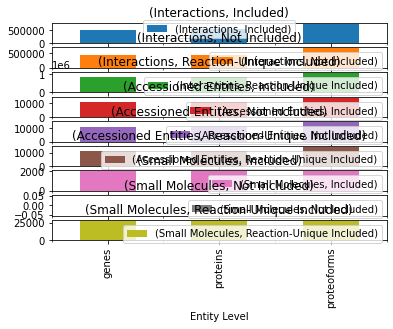

In [11]:
sizes.unstack(level=0).plot(kind='bar', subplots=True)

In [12]:
interactomes = [*interactomes_no_sm.values(), *interactomes_with_sm.values(), *interactomes_with_unique_sm.values()]
degree_sequences = pd.Series([sorted([d for n, d in interactome.degree()], reverse=True) for interactome in interactomes], index=index)
degree_sequences

Small Molecules           Entity Level
Not Included              genes           [1241, 1218, 1057, 1057, 902, 892, 586, 578, 5...
                          proteins        [1242, 1219, 1058, 1058, 904, 894, 594, 578, 5...
                          proteoforms     [1469, 1444, 1279, 1279, 915, 898, 627, 619, 6...
Included                  genes           [3431, 3270, 2678, 2093, 2089, 2084, 1372, 129...
                          proteins        [3452, 3292, 2767, 2181, 2169, 2104, 1379, 129...
                          proteoforms     [4085, 3963, 3061, 2412, 2299, 2221, 1520, 149...
Reaction-Unique Included  genes           [1920, 1890, 1809, 1769, 1559, 1559, 1498, 148...
                          proteins        [1922, 1892, 1810, 1770, 1560, 1560, 1500, 148...
                          proteoforms     [2029, 1987, 1933, 1896, 1773, 1773, 1494, 148...
dtype: object

In [31]:
mins = pd.Series([min(degree_sequence) for degree_sequence in degree_sequences], index=index)
maxs = pd.Series([max(degree_sequence) for degree_sequence in degree_sequences], index=index)
avgs = pd.Series([sum(degree_sequence)/len(degree_sequence) for degree_sequence in degree_sequences], index=index)

degrees_mma = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=index)
degrees_mma.columns.name = ""
degrees_mma

Min   Max   Avg
Small Molecules          Entity Level                 
Not Included             genes           0  1241 82.63
                         proteins        0  1242 83.58
                         proteoforms     0  1469 94.73
Included                 genes           0  3431 81.80
                         proteins        0  3452 82.71
                         proteoforms     0  4085 93.38
Reaction-Unique Included genes           0  1920 42.96
                         proteins        0  1922 43.58
                         proteoforms     0  2029 50.84

In [34]:
degrees_no_sm = degrees_mma.unstack(level=1).transpose()["Not Included"].unstack(level=0)
degrees_no_sm

,Min,Max,Avg
Entity Level,,,
genes,0.00,"1,241.00",82.63
proteins,0.00,"1,242.00",83.58
proteoforms,0.00,"1,469.00",94.73


In [ ]:
datas = { l: {'ENTITY': np.repeat(l, len(degrees[l])), 'DEGREE': degrees[l]} for l in LEVELS}
degrees_dfs = [pd.DataFrame(datas[l], columns=['ENTITY', 'DEGREE']) for l in LEVELS]

degrees_df = pd.concat(degrees_dfs)
sns.set(style="ticks")
ax = sns.violinplot(x="ENTITY", y="DEGREE", data=degrees_df)

No handles with labels found to put in legend.


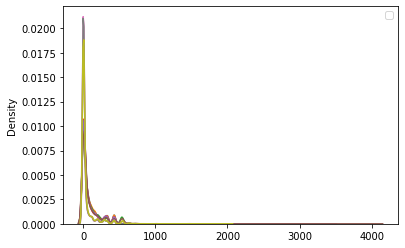

In [18]:
import matplotlib.pyplot as plt

[sns.kdeplot(sequence) for sequence in degree_sequences]
plt.legend();

In [ ]:
degrees = {l: [graphs[l].degree(n) for n, t in graphs[l].nodes(data='type') if t != "SimpleEntity"] for l in LEVELS}
mins = pd.Series([min(degrees[l]) for l in LEVELS], index=LEVELS)
maxs = pd.Series([max(degrees[l]) for l in LEVELS], index=LEVELS)
avgs = pd.Series([sum(degrees[l])/len(degrees[l]) for l in LEVELS], index=LEVELS)

degrees_df = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=LEVELS)
degrees_df.columns.name = "Entity Type"
degrees_df

In [ ]:
datas = { l: {'ENTITY': np.repeat(l, len(degrees[l])), 'DEGREE': degrees[l]} for l in LEVELS}
degrees_dfs = [pd.DataFrame(datas[l], columns=['ENTITY', 'DEGREE']) for l in LEVELS]

degrees_df = pd.concat(degrees_dfs)
sns.set(style="ticks")
ax = sns.violinplot(x="ENTITY", y="DEGREE", data=degrees_df)

In [ ]:
import matplotlib.pyplot as plt

[sns.kdeplot(degrees[l], label=l) for l in LEVELS]
plt.legend();

## Bridges and Articulation points

In [ ]:
br_ap = pd.DataFrame({
    "Articulation Points": [len(list(nx.articulation_points(graphs[l]))) for l in LEVELS],
    "Bridges": [len(list(nx.bridges(graphs[l]))) for l in LEVELS]},
    index=LEVELS)
br_ap.columns.name = "Entity Type"

br_ap

In [ ]:
#plot_low_level_pathways(figures_path="figures/pathways/", graphs_path="reports/pathways/")

In [ ]:
# TODO: Write function that plots and highlights the articulation points of an interaction network.
# TODO: Write function that plots and highlights also the bridges of the network.

## Connected components

- Number of connected components
- Size of the largest connected component
- Average size of the connected components
- Size of the smalles connected component
